In [1]:
from google.colab import files
uploaded = files.upload()

Saving Loan_Default_cleaned.csv to Loan_Default_cleaned.csv


In [3]:
import pandas as pd
import sqlite3

In [4]:
df=pd.read_csv("Loan_Default_cleaned.csv")

In [5]:
conn=sqlite3.connect("creditpathai.db")

In [6]:
df.to_sql("raw_loans",conn,if_exists="replace",index=False)

148670

In [7]:
conn.close()

In [8]:
print("CSV successfully converted to SQLite!")

CSV successfully converted to SQLite!


In [10]:
 from google.colab import files
uploaded = files.upload()

Saving loan_data_preprocessed.csv to loan_data_preprocessed.csv


In [11]:
df=pd.read_csv("loan_data_preprocessed.csv")

In [12]:
conn = sqlite3.connect("creditpathai.db")

In [13]:
df.to_sql("processed_loans",conn,if_exists="replace",index=False)

148666

In [14]:
conn.close()

In [15]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("creditpathai.db")

In [16]:
query = "SELECT name FROM sqlite_master WHERE type='table';"
pd.read_sql(query, conn)

,name
0,raw_loans
1,processed_loans


In [17]:
raw_df = pd.read_sql("SELECT * FROM raw_loans", conn)
proc_df = pd.read_sql("SELECT * FROM processed_loans", conn)

In [18]:
raw_df.head()
raw_df.shape
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   year                       148670 non-null  int64  
 1   loan_type                  148670 non-null  object 
 2   loan_purpose               148536 non-null  object 
 3   Credit_Worthiness          148670 non-null  object 
 4   open_credit                148670 non-null  object 
 5   loan_amount                148670 non-null  int64  
 6   rate_of_interest           112231 non-null  float64
 7   Interest_rate_spread       112031 non-null  float64
 8   Upfront_charges            109028 non-null  float64
 9   term                       148629 non-null  float64
 10  Neg_ammortization          148549 non-null  object 
 11  interest_only              148670 non-null  object 
 12  lump_sum_payment           148670 non-null  object 
 13  property_value             13

In [19]:
raw_df.isnull().sum()

,0
year,0
loan_type,0
loan_purpose,134
Credit_Worthiness,0
open_credit,0
loan_amount,0
rate_of_interest,36439
Interest_rate_spread,36639
Upfront_charges,39642
term,41


In [20]:
raw_df.describe()

,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [21]:
raw_df['Status'].value_counts()

,count
Status,
0,112031
1,36639


In [22]:
raw_df['Status'].value_counts(normalize=True)

,proportion
Status,
0,0.753555
1,0.246445


In [23]:
proc_df.head()
proc_df.shape

(148666, 38)

In [24]:
proc_df.isnull().sum().sum()

np.int64(0)

In [25]:
proc_df.describe()

,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,...,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,co-applicant_credit_type_EXP,submission_of_application_to_inst,Region_North-East,Region_central,Region_south,Security_Type_direct,Status
count,148666.0,1.486660e+05,1.486660e+05,1.486660e+05,1.486660e+05,1.486660e+05,1.486660e+05,1.486660e+05,1.486660e+05,1.486660e+05,...,1.486660e+05,1.486660e+05,1.486660e+05,1.486660e+05,1.486660e+05,1.486660e+05,1.486660e+05,1.486660e+05,1.486660e+05,148666.000000
mean,0.0,-1.730163e-17,6.631496e-16,1.607092e-16,-7.479850e-17,3.538710e-16,-2.609583e-17,-1.261777e-17,-3.656285e-17,1.766069e-16,...,2.210499e-17,-5.580016e-18,-1.172162e-16,1.239791e-16,3.037345e-17,8.220666e-18,1.715825e-17,1.361428e-16,7.266208e-16,0.246425
std,0.0,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,...,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,0.430930
min,0.0,-1.710730e+00,-8.256087e+00,-9.120707e+00,-1.092713e+00,-4.094705e+00,-1.408624e+00,-1.092656e+00,-1.724207e+00,-1.900751e+00,...,-6.473350e-01,-3.386445e-01,-6.204013e-01,-9.992066e-01,-1.350332e+00,-9.152486e-02,-2.492693e-01,-8.695987e-01,-6.711207e+01,0.000000
25%,0.0,-7.319865e-01,-5.772058e-01,-5.550994e-01,-6.459650e-01,4.256161e-01,-5.899688e-01,-4.831378e-01,-8.698379e-01,-2.557602e-01,...,-6.473350e-01,-3.386445e-01,-6.204013e-01,-9.992066e-01,-1.350332e+00,-9.152486e-02,-2.492693e-01,-8.695987e-01,1.490045e-02,0.000000
50%,0.0,-1.882400e-01,-8.575737e-02,-8.662038e-02,-1.647464e-01,4.256161e-01,-2.098789e-01,-1.783785e-01,-6.838930e-03,5.666187e-02,...,-6.473350e-01,-3.386445e-01,-6.204013e-01,-9.992066e-01,7.405584e-01,-9.152486e-02,-2.492693e-01,-8.695987e-01,1.490045e-02,0.000000
75%,0.0,5.730051e-01,4.466451e-01,4.282804e-01,2.975017e-01,4.256161e-01,3.163996e-01,2.216181e-01,8.647900e-01,3.096598e-01,...,1.544795e+00,-3.386445e-01,1.611860e+00,1.000794e+00,7.405584e-01,-9.152486e-02,-2.492693e-01,1.149956e+00,1.490045e-02,0.000000
max,0.0,1.764664e+01,8.125526e+00,6.566275e+00,2.035117e+01,4.256161e-01,4.683356e+01,9.074465e+01,1.727789e+00,2.047519e+02,...,1.544795e+00,2.952949e+00,1.611860e+00,1.000794e+00,7.405584e-01,1.092599e+01,4.011725e+00,1.149956e+00,1.490045e-02,1.000000


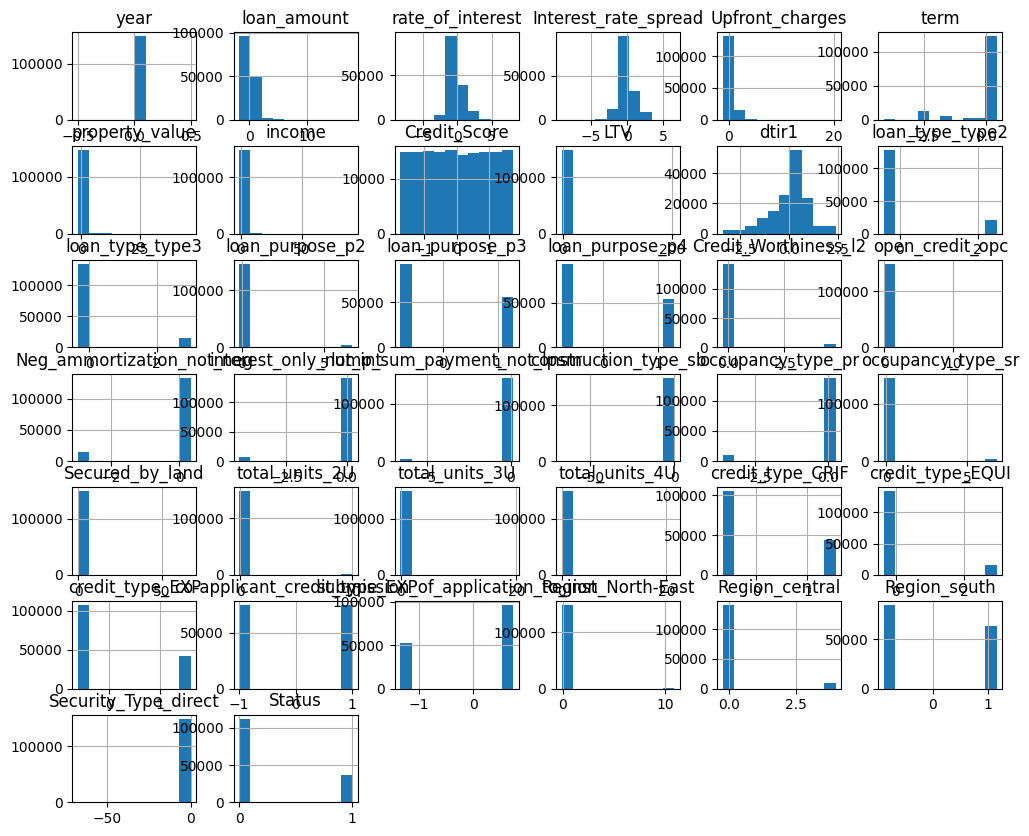

In [26]:
import matplotlib.pyplot as plt

df.hist(figsize=(12,10))
plt.show()

In [28]:
df.columns

Index(['year', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score',
       'LTV', 'dtir1', 'loan_type_type2', 'loan_type_type3', 'loan_purpose_p2',
       'loan_purpose_p3', 'loan_purpose_p4', 'Credit_Worthiness_l2',
       'open_credit_opc', 'Neg_ammortization_not_neg', 'interest_only_not_int',
       'lump_sum_payment_not_lpsm', 'construction_type_sb',
       'occupancy_type_pr', 'occupancy_type_sr', 'Secured_by_land',
       'total_units_2U', 'total_units_3U', 'total_units_4U',
       'credit_type_CRIF', 'credit_type_EQUI', 'credit_type_EXP',
       'co-applicant_credit_type_EXP', 'submission_of_application_to_inst',
       'Region_North-East', 'Region_central', 'Region_south',
       'Security_Type_direct', 'Status'],
      dtype='object')

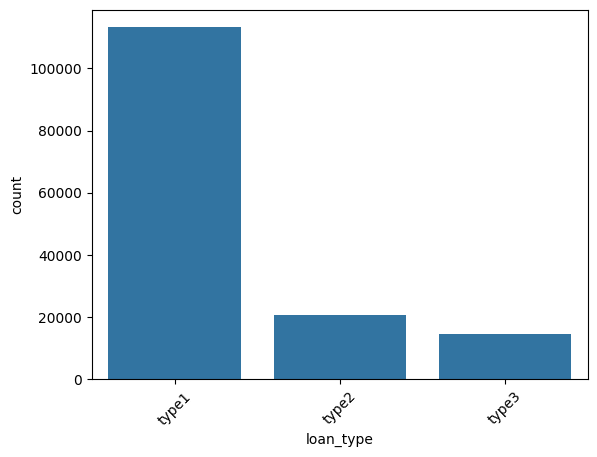

In [29]:
df = raw_df
sns.countplot(x='loan_type', data=df)
plt.xticks(rotation=45)
plt.show()

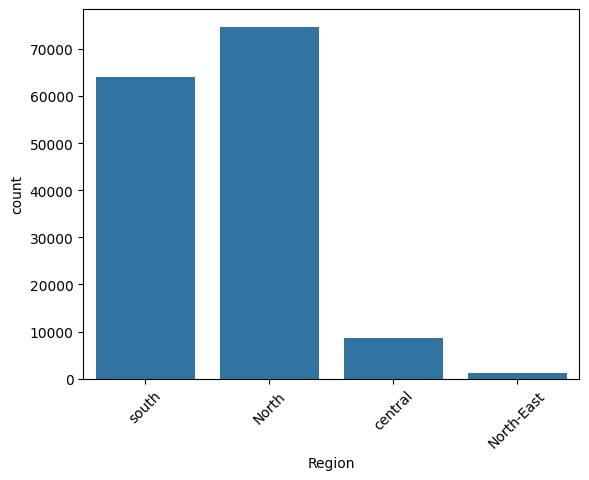

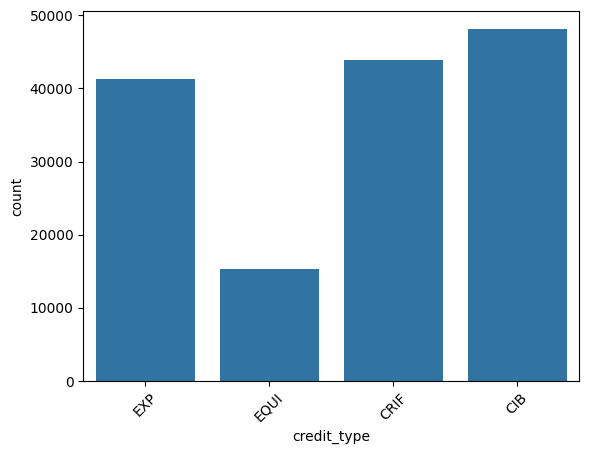

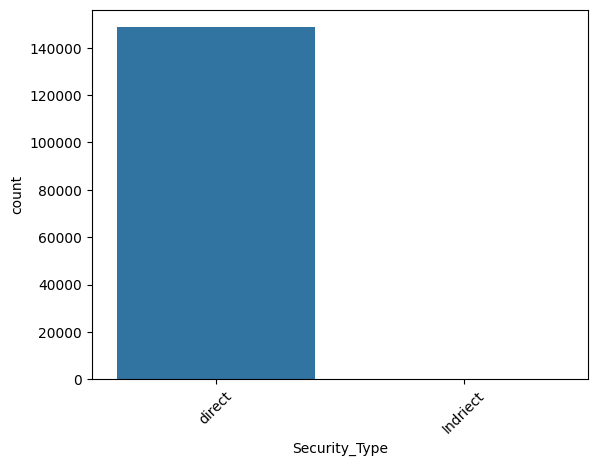

In [30]:
import seaborn as sns

sns.countplot(x='Region', data=df)
plt.xticks(rotation=45)
plt.show()

sns.countplot(x='credit_type', data=df)
plt.xticks(rotation=45)
plt.show()

sns.countplot(x='Security_Type', data=df)
plt.xticks(rotation=45)
plt.show()

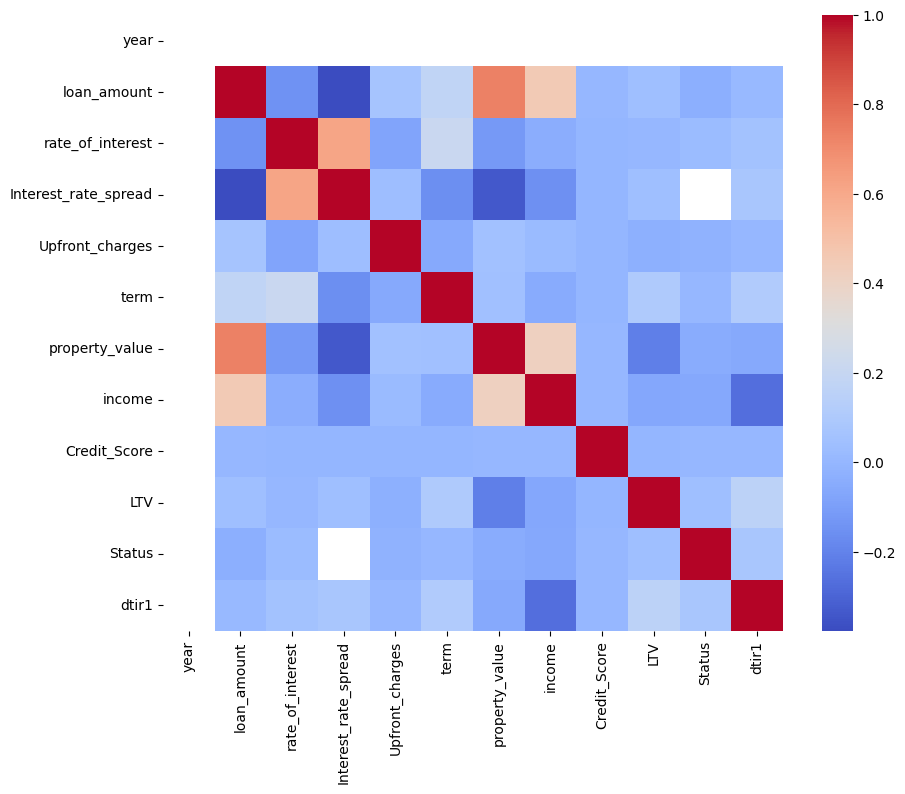

In [32]:
df = raw_df

plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=['int64','float64']).corr(), cmap="coolwarm")
plt.show()

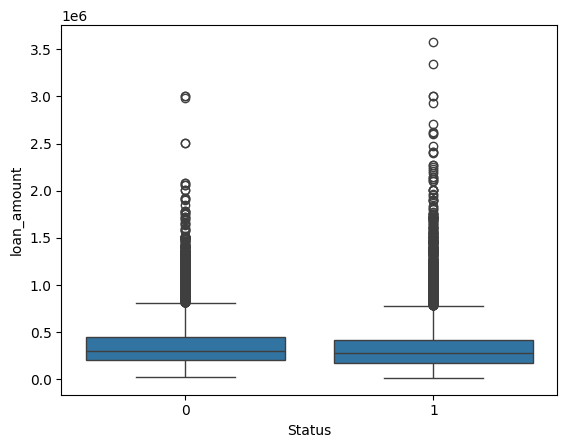

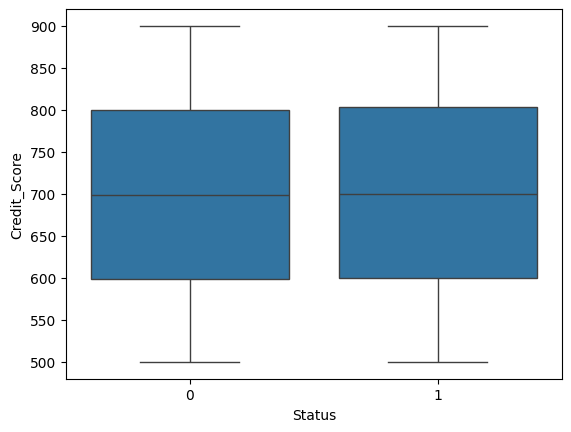

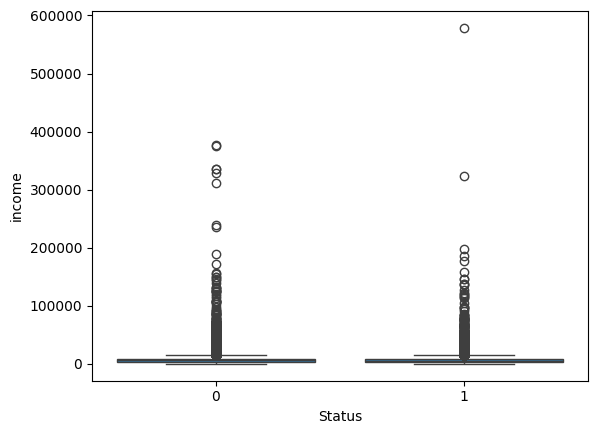

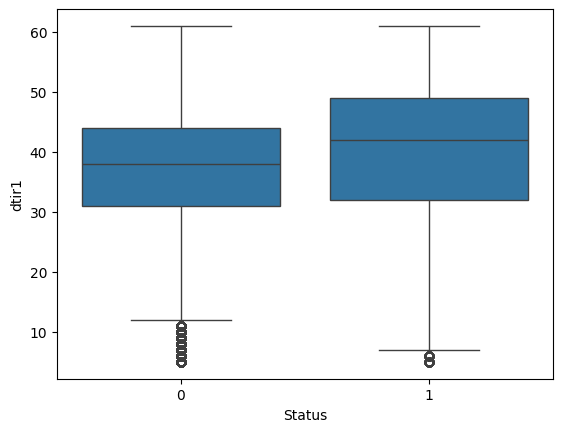

In [33]:
sns.boxplot(x='Status', y='loan_amount', data=df)
plt.show()

sns.boxplot(x='Status', y='Credit_Score', data=df)
plt.show()

sns.boxplot(x='Status', y='income', data=df)
plt.show()

sns.boxplot(x='Status', y='dtir1', data=df)
plt.show()

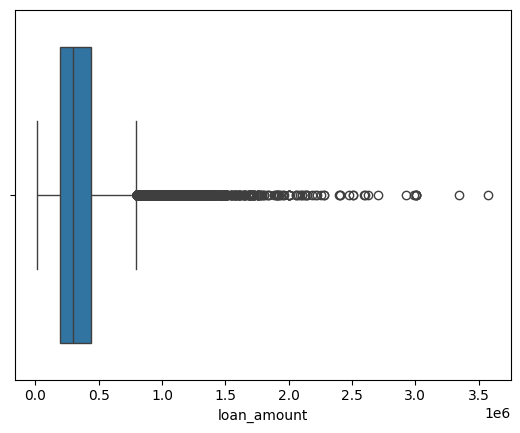

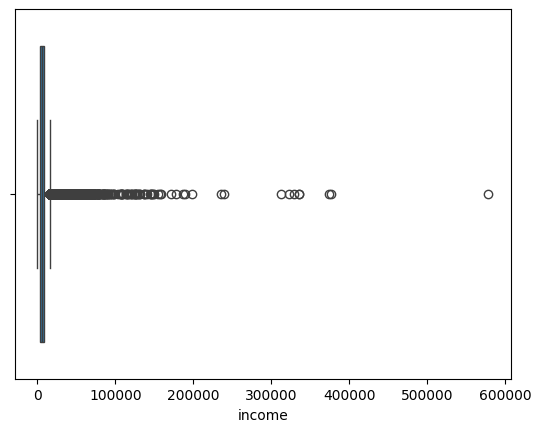

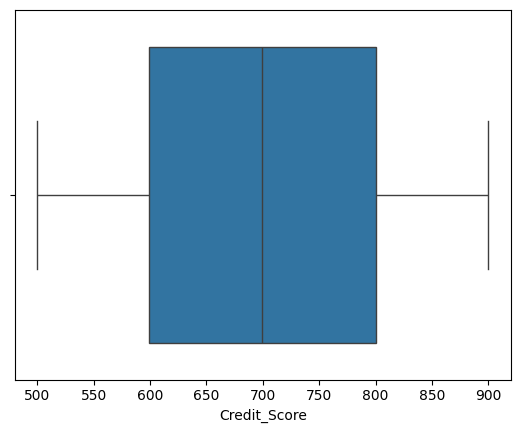

In [34]:
sns.boxplot(x=df['loan_amount'])
plt.show()

sns.boxplot(x=df['income'])
plt.show()

sns.boxplot(x=df['Credit_Score'])
plt.show()

In [35]:
#Processed Table

In [36]:
df = proc_df

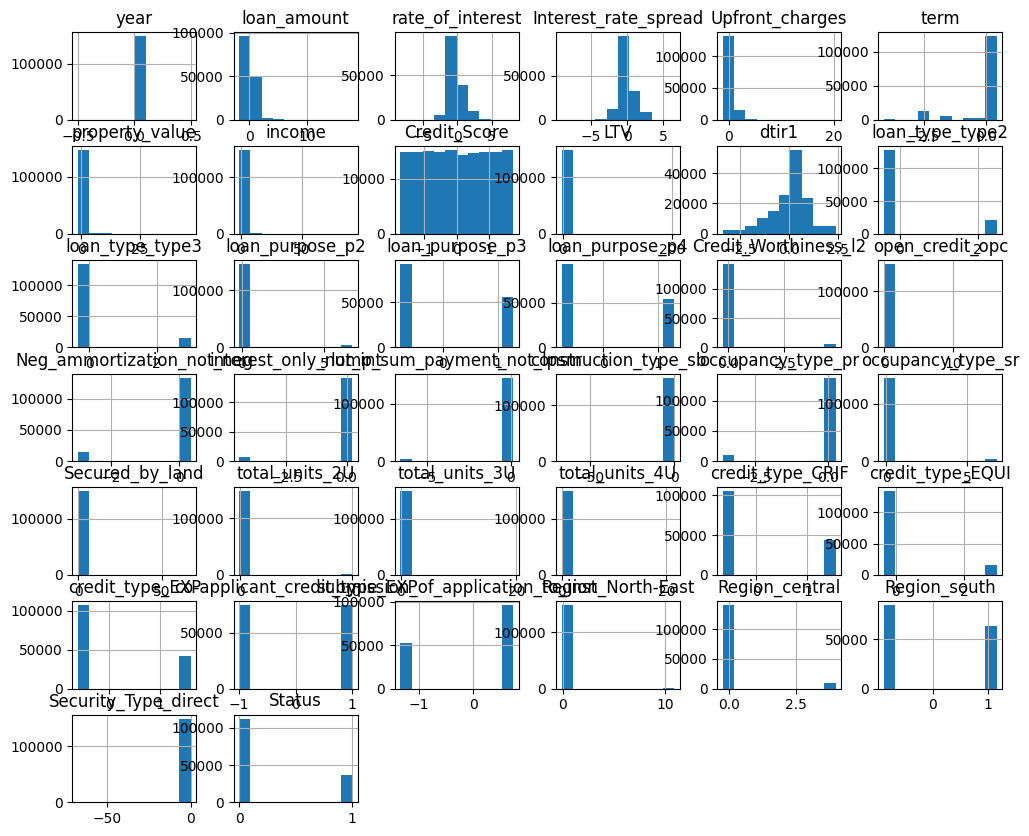

In [37]:
df.hist(figsize=(12,10))
plt.show()

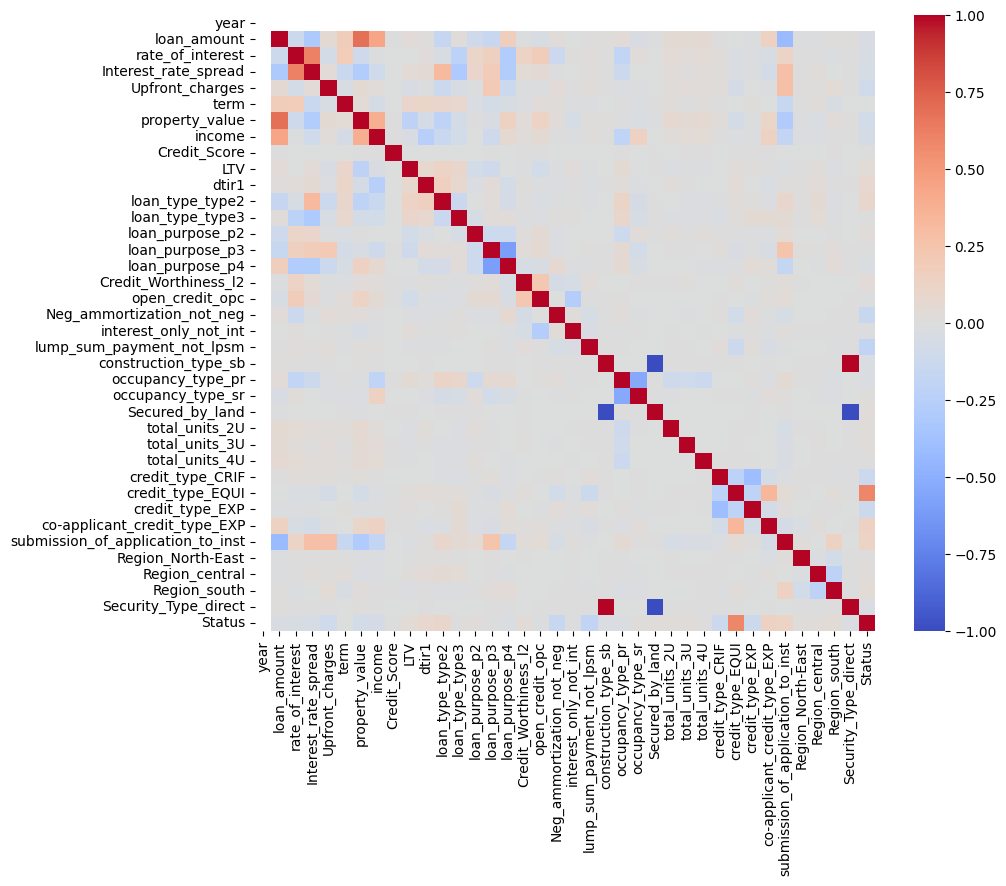

In [38]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.show()

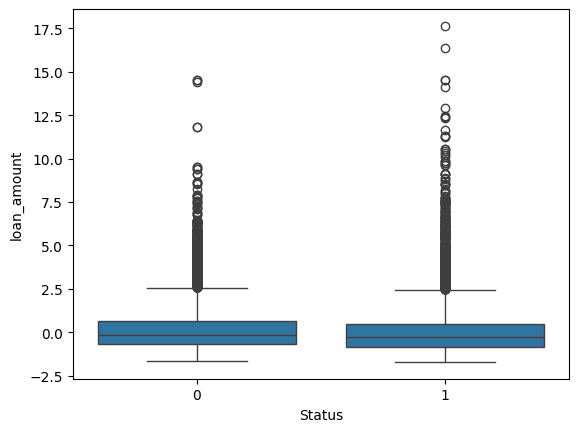

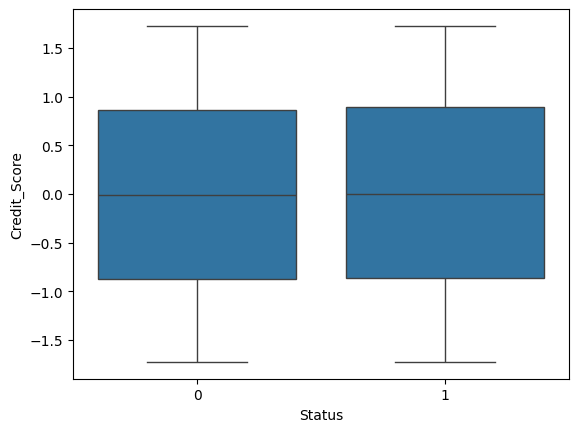

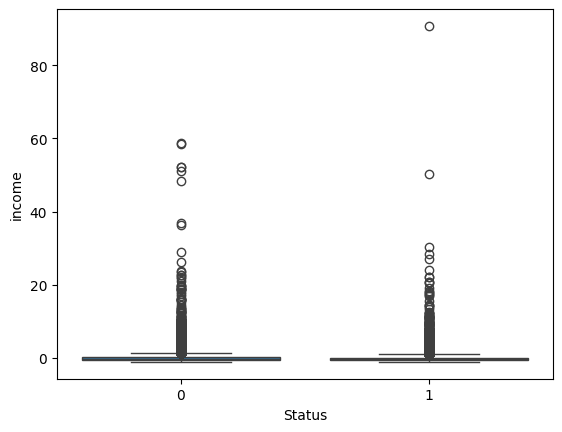

In [39]:
sns.boxplot(x='Status', y='loan_amount', data=df)
plt.show()

sns.boxplot(x='Status', y='Credit_Score', data=df)
plt.show()

sns.boxplot(x='Status', y='income', data=df)
plt.show()

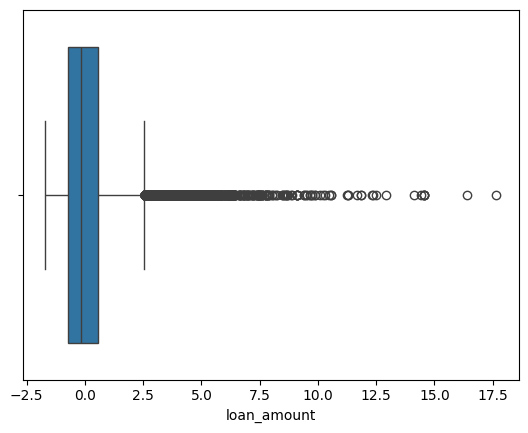

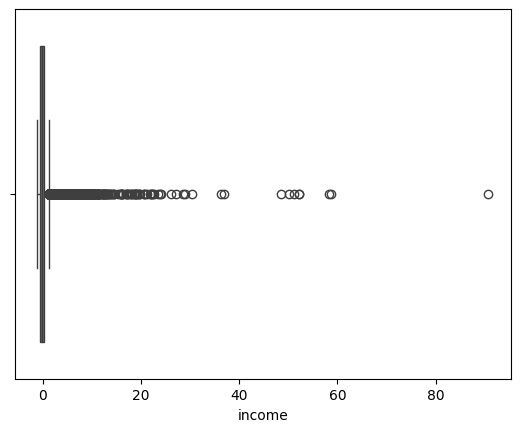

In [40]:
sns.boxplot(x=df['loan_amount'])
plt.show()

sns.boxplot(x=df['income'])
plt.show()